# DSP HW0
## Mylavarapu Sri Akhil - ES19BTECH11014
## Korra Mahesh - ES19BTECH11013

Enter R if inputs are real C otherwise : gt
Enter the number of Samples : 4
1+2j
3+7j
9+6j
1+1j


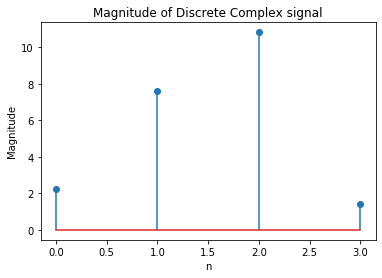

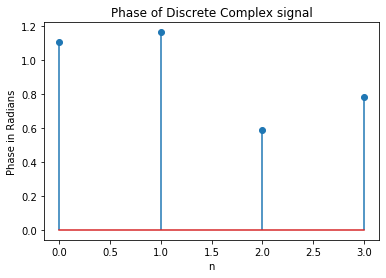

In [12]:
#question 1

#importing modules
import numpy as np
from matplotlib import pyplot as plt

rc = input("Enter R if inputs are real C otherwise : ")

#taking the number of samples ads input
M = int(input("Enter the number of Samples : "))

if rc == 'R' :

    #for real values
    #creating an empty list x[n] values
    x = []

    #accepting discrete values of x[n] and appending it to the previously created list
    print("Enter the discrete values(using Enter) : ")
    for i in range(M):
        value = int(input())
        x.append(value)
`
    #list for n values
    n = [i for i in range(0 , M)]

    #creating stem plot
    plt.stem(n , y , use_line_collection=True)

    #labelling axes and giving it a title
    plt.xlabel('n')
    plt.ylabel('x[n]')
    plt.title('Discrete Real Signal')

    #showing plot
    plt.show()

else:
    
    #for complex values
    #lists for magnitude and phase
    mag = []
    phase = []
    for i in range(M):
        value = complex(input())
        mag.append(np.sqrt(value.real ** 2 + value.imag ** 2))
        phase.append(np.angle(value))
    
    #list for n values
    n = [i for i in range(0 , M)]
    
    #creating stem plot for magnitude
    plt.stem(n , mag , use_line_collection=True)
    
    #labelling axes and giving it a title
    plt.xlabel('n')
    plt.ylabel('Magnitude')
    plt.title('Magnitude of Discrete Complex signal')
    
    #showing plot
    plt.show()

    #creating stem plot for magnitude
    plt.stem(n , phase , use_line_collection=True)
    
    #labelling axes and giving it a title
    plt.xlabel('n')
    plt.ylabel('Phase in Radians')
    plt.title('Phase of Discrete Complex signal')
    
    #showing plot
    plt.show()
        
    


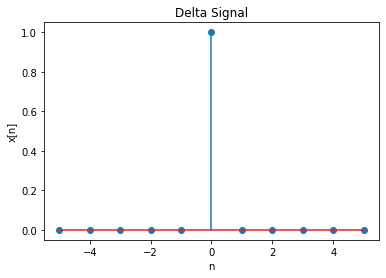

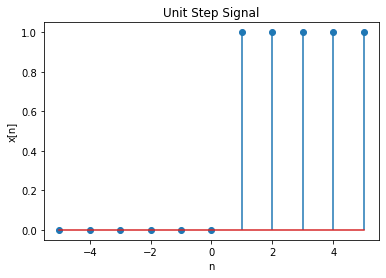

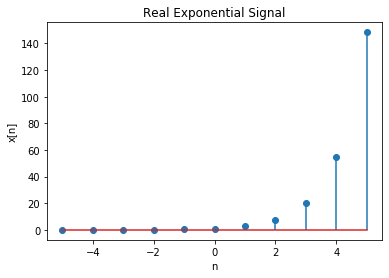

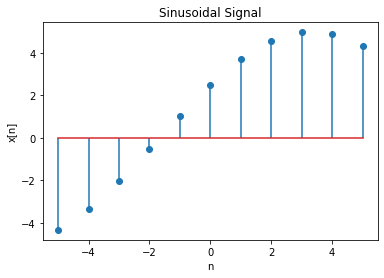

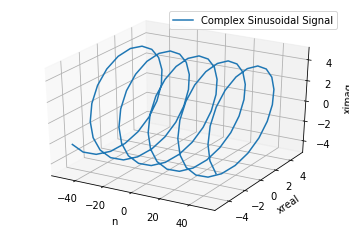

In [22]:
#question 2

#importing modules
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #had to add it to plot 3d plots (https://stackoverflow.com/questions/56222259/valueerror-unknown-projection-3d-once-again)

#delta signal
def delta(d):
    
    #x is 1 only for d and 0 otherwise
    x = [1 if i in d else 0 for i in range(-5 , 6)]
    n = [i for i in range(-5 , 6)]
    
    #plots signal
    plt.stem(n , x , use_line_collection=True)
    plt.xlabel('n')
    plt.ylabel('x[n]')
    plt.title('Delta Signal')
    plt.show()
    
#unit step signal
def step():
    
    #1 for n>0 and 0 otherwise
    x = [1 if i > 0 else 0 for i in range(-5 , 6)]
    n = [i for i in range(-5 , 6)]
    
    #plots signal
    plt.stem(n , x , use_line_collection=True)
    plt.xlabel('n')
    plt.ylabel('x[n]')
    plt.title('Unit Step Signal')
    plt.show()
    
#real exponential signal
def real_exp(a):

    #a^n
    x = [a ** i for i in range(-5 , 6)]
    n = [i for i in range(-5 , 6)]
    
    #plots signal
    plt.stem(n , x , use_line_collection=True)
    plt.xlabel('n')
    plt.ylabel('x[n]')
    plt.title('Real Exponential Signal')
    plt.show()
    
#sinusoidal(real)
def sinusoid(amp , period , phase_diff):
    
    #frequency
    w_0 = (2 * np.pi)/period
    
    #A*sin(ωn + ø(in rad))
    x = [amp * np.sin(w_0 * i + (phase_diff * np.pi/180)) for i in range(-5 , 6)]
    n = [i for i in range(-5 , 6)]
    
    #plots signal
    plt.stem(n , x , use_line_collection=True)
    plt.xlabel('n')
    plt.ylabel('x[n]')
    plt.title('Sinusoidal Signal')
    plt.show()
    
#sinusoidal(complex)
def comp_sinusoid(amp , period , phase_diff):
    
    #frequency
    w_0 = (2 * np.pi)/period
    
    n = [i for i in range(-50 , 51)]
    
    xreal = [(amp * np.cos(w_0 * i + (phase_diff * np.pi/180))) for i in range(-50 , 51)]
    ximag = [(amp * np.sin(w_0 * i + (phase_diff * np.pi/180))) for i in range(-50 , 51)]
    
    
    fig = plt.figure()
    axes = fig.gca(projection = '3d')
    axes.plot(n , xreal , ximag , label = 'Complex Sinusoidal Signal')
    axes.set_xlabel('n')
    axes.set_ylabel('xreal')
    axes.set_zlabel('ximag')
    axes.legend()
    plt.show()
    
d = [0]
delta(d)
step()
real_exp(np.e)
sinusoid(5 , 20 , 30)
comp_sinusoid(5 , 20 , 30)


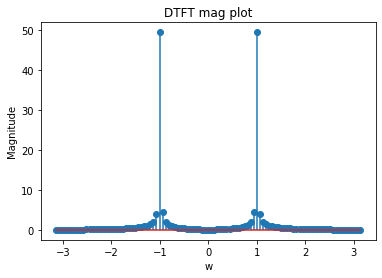

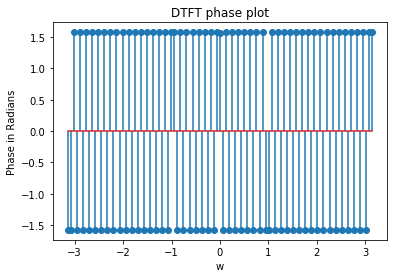

In [36]:
#question 3

#importing modules
import numpy as np
from matplotlib import pyplot as plt

#DTFT with x[n] , n and w as parameters
def dtft(n , x , w):
    
    value = 0;
    
    for i in range(len(n)):
        value += x[i] * (np.exp(-1j * w * n[i])) #dtft expression
    
    #mag and phase for each w
    mag = np.sqrt((value.real ** 2) + (value.imag ** 2)) 
    phase = np.angle(value)
    
    return mag , phase

#a sin signal
amp = 1
period = 2*np.pi
phase_diff = 0
    
#frequency
w_0 = (2 * np.pi)/period

#A*sin(ωn + ø(in rad))
x = [amp * np.sin(w_0 * i + (phase_diff * np.pi/180)) for i in range(-50 , 51)]
n = [i for i in range(-50 , 51)]

#partitioning frequencies from -pi to pi and creating a list
w_0_list = np.linspace(-np.pi , np.pi , 101)
w_0_list = w_0_list.tolist()

#empty lists for mag and phase
mag = []
phase = []

#running the dtft for all w
for w in w_0_list:
    m , p = dtft(n , x , w)
    mag.append(m)
    phase.append(p)
        
#creating stem plot for magnitude
plt.stem(w_0_list , mag , use_line_collection=True)

#labelling axes and giving it a title
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('DTFT mag plot')

#showing plot
plt.show()

#creating stem plot for magnitude
plt.stem(w_0_list , phase , use_line_collection=True)

#labelling axes and giving it a title
plt.xlabel('w')
plt.ylabel('Phase in Radians')
plt.title('DTFT phase plot')

#showing plot
plt.show()

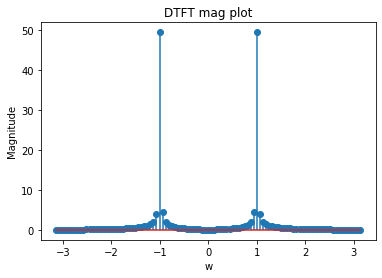

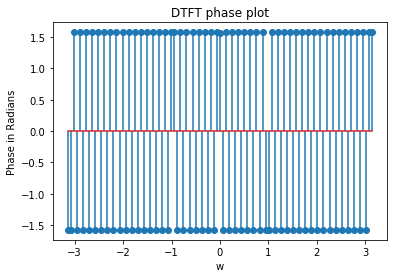

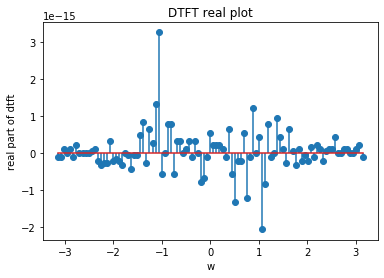

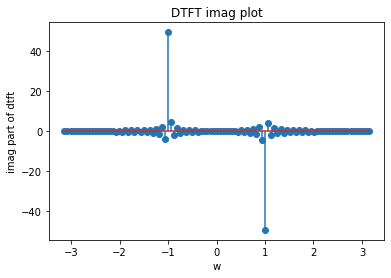

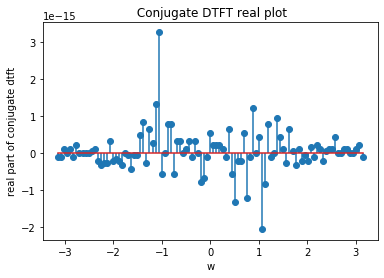

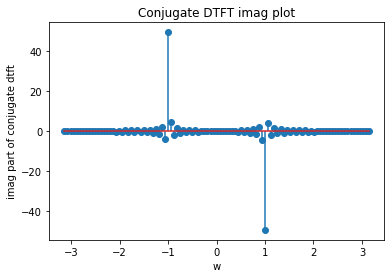

In [37]:
#question 4a

#importing modules
import numpy as np
from matplotlib import pyplot as plt

#DTFT with x[n] , n and w as parameters
def dtft(n , x , w):
    
    value = 0;
    
    for i in range(len(n)):
        value += x[i] * (np.exp(-1j * w * n[i])) #dtft expression
    
    #mag and phase for each w
    mag = np.sqrt((value.real ** 2) + (value.imag ** 2)) 
    phase = np.angle(value)
    
    return mag , phase , value

#a sin signal
amp = 1
period = 2*np.pi
phase_diff = 0
    
#frequency
w_0 = (2 * np.pi)/period

#A*sin(ωn + ø(in rad))
x = [amp * np.sin(w_0 * i + (phase_diff * np.pi/180)) for i in range(-50 , 51)]
n = [i for i in range(-50 , 51)]

#partitioning frequencies from -pi to pi and creating a list
w_0_list = np.linspace(-np.pi , np.pi , 101)
w_0_list = w_0_list.tolist()

#empty lists for mag , phase , real and imag parts
mag = []
phase = []
dtft_real = []
dtft_imag = []
conj_real = []
conj_imag = []

#running the dtft for all w
for w in w_0_list:
    m , p , v = dtft(n , x , w)
    mag.append(m)
    phase.append(p)
    dtft_real.append(v.real)
    dtft_imag.append(v.imag) 
    m , p , v = dtft(n , x , -w) #to find conjugate (X(exp(jw)))
    conj_real.append(v.real)
    conj_imag.append(-v.imag)    #to find conjugate (Conjugate of X(exp(jw)))
        
#plots for mag and phase
plt.stem(w_0_list , mag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('DTFT mag plot')
plt.show()

plt.stem(w_0_list , phase , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Phase in Radians')
plt.title('DTFT phase plot')
plt.show()

#plots for real and imaginary parts
plt.stem(w_0_list , dtft_real , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('real part of dtft')
plt.title('DTFT real plot')
plt.show()

plt.stem(w_0_list , dtft_imag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('imag part of dtft')
plt.title('DTFT imag plot')
plt.show()

#plots for real and imaginary parts of conjugate
plt.stem(w_0_list , conj_real , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('real part of conjugate dtft')
plt.title(' Conjugate DTFT real plot')
plt.show()

plt.stem(w_0_list , dtft_imag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('imag part of conjugate dtft')
plt.title('Conjugate DTFT imag plot')
plt.show()



The plots of DTFT and Conjugate DTFT are identical 
Hence it is conjugate symmetric


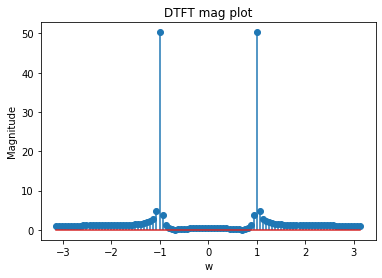

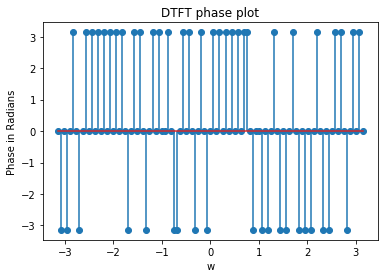

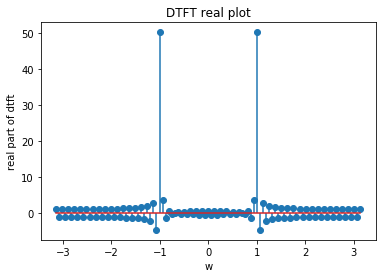

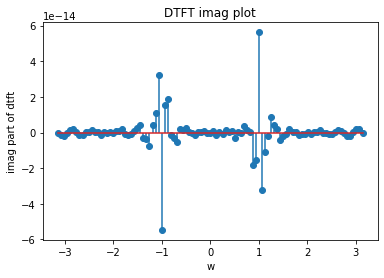

In [38]:
#question 4b

#importing modules
import numpy as np
from matplotlib import pyplot as plt

#DTFT with x[n] , n and w as parameters
def dtft(n , x , w):
    
    value = 0;
    
    for i in range(len(n)):
        value += x[i] * (np.exp(-1j * w * n[i])) #dtft expression
    
    #mag and phase for each w
    mag = np.sqrt((value.real ** 2) + (value.imag ** 2)) 
    phase = np.angle(value)
    
    return mag , phase , value

#a cos signal(real and even)
amp = 1
period = 2*np.pi
phase_diff = 90
    
#frequency
w_0 = (2 * np.pi)/period

#A*sin(ωn + ø(in rad))
x = [amp * np.sin(w_0 * i + (phase_diff * np.pi/180)) for i in range(-50 , 51)]
n = [i for i in range(-50 , 51)]

#partitioning frequencies from -pi to pi and creating a list
w_0_list = np.linspace(-np.pi , np.pi , 101)
w_0_list = w_0_list.tolist()

#empty lists for mag , phase , real and imag parts
mag = []
phase = []
dtft_real = []
dtft_imag = []

#running the dtft for all w
for w in w_0_list:
    m , p , v = dtft(n , x , w)
    mag.append(m)
    phase.append(p)
    dtft_real.append(v.real)
    dtft_imag.append(v.imag) 
        
#plots for mag and phase
plt.stem(w_0_list , mag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('DTFT mag plot')
plt.show()

plt.stem(w_0_list , phase , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Phase in Radians')
plt.title('DTFT phase plot')
plt.show()

#plots for real and imaginary parts
plt.stem(w_0_list , dtft_real , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('real part of dtft')
plt.title('DTFT real plot')
plt.show()

plt.stem(w_0_list , dtft_imag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('imag part of dtft')
plt.title('DTFT imag plot')
plt.show()

The real part of DTFT is even and the imaginary part is extremely small but not precisely 0 as np.pi and np.e are not accurate

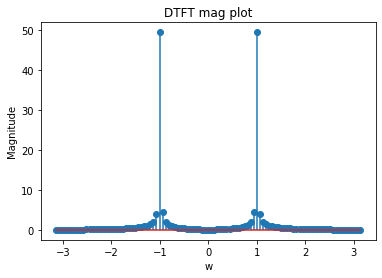

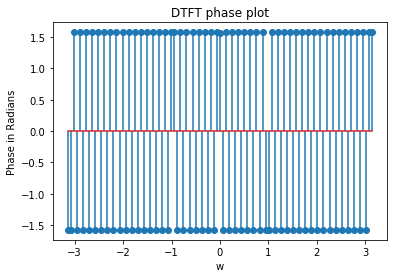

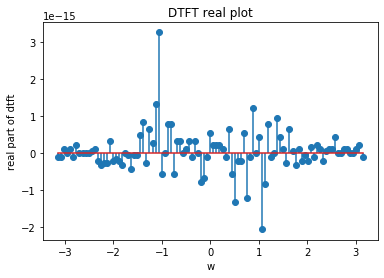

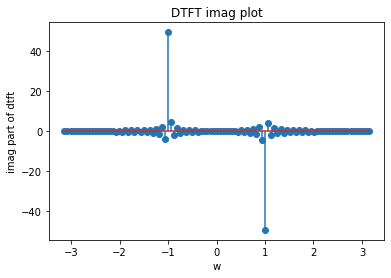

In [39]:
#question 4c

#importing modules
import numpy as np
from matplotlib import pyplot as plt

#DTFT with x[n] , n and w as parameters
def dtft(n , x , w):
    
    value = 0;
    
    for i in range(len(n)):
        value += x[i] * (np.exp(-1j * w * n[i])) #dtft expression
    
    #mag and phase for each w
    mag = np.sqrt((value.real ** 2) + (value.imag ** 2)) 
    phase = np.angle(value)
    
    return mag , phase , value

#a sin signal(real and odd)
amp = 1
period = 2*np.pi
phase_diff = 0
    
#frequency
w_0 = (2 * np.pi)/period

#A*sin(ωn + ø(in rad))
x = [amp * np.sin(w_0 * i + (phase_diff * np.pi/180)) for i in range(-50 , 51)]
n = [i for i in range(-50 , 51)]

#partitioning frequencies from -pi to pi and creating a list
w_0_list = np.linspace(-np.pi , np.pi , 101)
w_0_list = w_0_list.tolist()

#empty lists for mag , phase , real and imag parts
mag = []
phase = []
dtft_real = []
dtft_imag = []

#running the dtft for all w
for w in w_0_list:
    m , p , v = dtft(n , x , w)
    mag.append(m)
    phase.append(p)
    dtft_real.append(v.real)
    dtft_imag.append(v.imag) 
        
#plots for mag and phase
plt.stem(w_0_list , mag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('DTFT mag plot')
plt.show()

plt.stem(w_0_list , phase , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Phase in Radians')
plt.title('DTFT phase plot')
plt.show()

#plots for real and imaginary parts
plt.stem(w_0_list , dtft_real , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('real part of dtft')
plt.title('DTFT real plot')
plt.show()

plt.stem(w_0_list , dtft_imag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('imag part of dtft')
plt.title('DTFT imag plot')
plt.show()

The imaginary part of DTFT is odd and the real part is extremely small but not precisely 0 as np.pi and np.e are not accurate

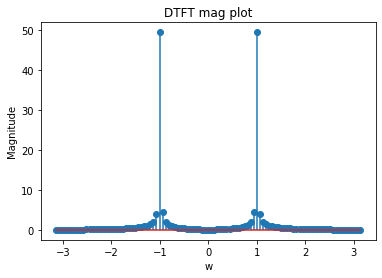

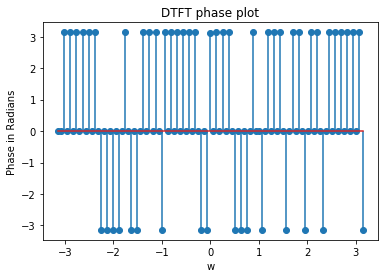

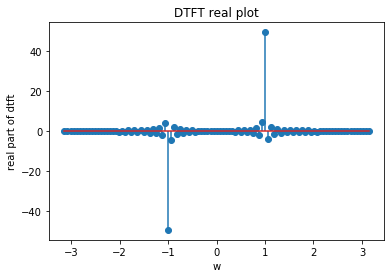

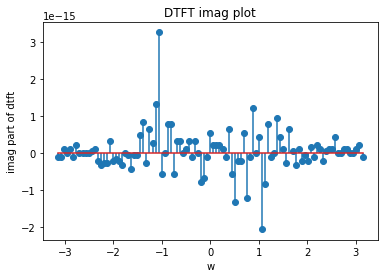

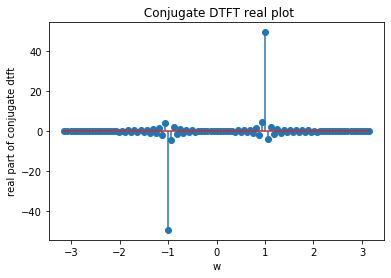

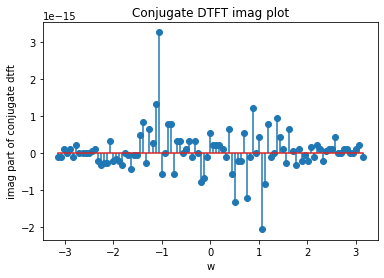

In [40]:
#question 4d

#importing modules
import numpy as np
from matplotlib import pyplot as plt

#DTFT with x[n] , n and w as parameters
def dtft(n , x , w):
    
    value = 0;
    
    for i in range(len(n)):
        value += x[i] * (np.exp(-1j * w * n[i])) #dtft expression
    
    #mag and phase for each w
    mag = np.sqrt((value.real ** 2) + (value.imag ** 2)) 
    phase = np.angle(value)
    
    return mag , phase , value

#a sin signal
amp = 1
period = 2*np.pi
phase_diff = 0
    
#frequency
w_0 = (2 * np.pi)/period

#A*sin(ωn + ø(in rad))
x = [(amp * np.sin(w_0 * i + (phase_diff * np.pi/180)))*1j for i in range(-50 , 51)]
n = [i for i in range(-50 , 51)]

#partitioning frequencies from -pi to pi and creating a list
w_0_list = np.linspace(-np.pi , np.pi , 101)
w_0_list = w_0_list.tolist()

#empty lists for mag , phase , real and imag parts
mag = []
phase = []
dtft_real = []
dtft_imag = []
conj_real = []
conj_imag = []

#running the dtft for all w
for w in w_0_list:
    m , p , v = dtft(n , x , w)
    mag.append(m)
    phase.append(p)
    dtft_real.append(v.real)
    dtft_imag.append(v.imag) 
    m , p , v = dtft(n , x , -w) #(X(exp(jw)))
    conj_real.append(-v.real)     #-(Conjugate of X(exp(jw)))
    conj_imag.append(v.imag)    
        
#plots for mag and phase
plt.stem(w_0_list , mag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('DTFT mag plot')
plt.show()

plt.stem(w_0_list , phase , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Phase in Radians')
plt.title('DTFT phase plot')
plt.show()

#plots for real and imaginary parts
plt.stem(w_0_list , dtft_real , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('real part of dtft')
plt.title('DTFT real plot')
plt.show()

plt.stem(w_0_list , dtft_imag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('imag part of dtft')
plt.title('DTFT imag plot')
plt.show()

#plots for real and imaginary parts of conjugate
plt.stem(w_0_list , conj_real , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('real part of conjugate dtft')
plt.title(' Conjugate DTFT real plot')
plt.show()

plt.stem(w_0_list , dtft_imag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('imag part of conjugate dtft')
plt.title('Conjugate DTFT imag plot')
plt.show()


The plots of DTFT and Conjugate DTFT are identical
Hence it is conjugate symmetric

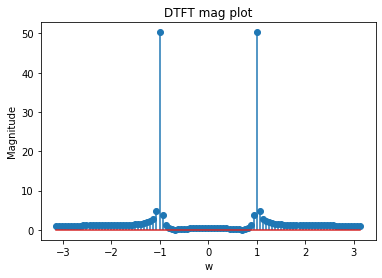

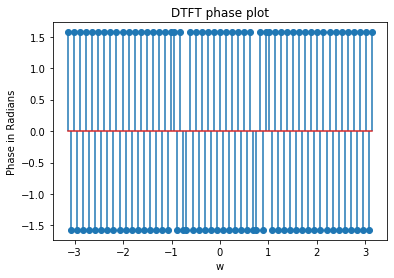

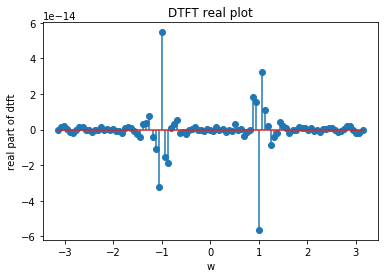

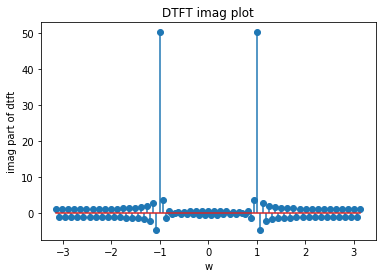

In [41]:
#question 4e

#importing modules
import numpy as np
from matplotlib import pyplot as plt

#DTFT with x[n] , n and w as parameters
def dtft(n , x , w):
    
    value = 0;
    
    for i in range(len(n)):
        value += x[i] * (np.exp(-1j * w * n[i])) #dtft expression
    
    #mag and phase for each w
    mag = np.sqrt((value.real ** 2) + (value.imag ** 2)) 
    phase = np.angle(value)
    
    return mag , phase , value

#a cos signal(imag and even)
amp = 1
period = 2*np.pi
phase_diff = 90
    
#frequency
w_0 = (2 * np.pi)/period

#A*sin(ωn + ø(in rad))
x = [(amp * np.sin(w_0 * i + (phase_diff * np.pi/180)))*1j for i in range(-50 , 51)]
n = [i for i in range(-50 , 51)]

#partitioning frequencies from -pi to pi and creating a list
w_0_list = np.linspace(-np.pi , np.pi , 101)
w_0_list = w_0_list.tolist()

#empty lists for mag , phase , real and imag parts
mag = []
phase = []
dtft_real = []
dtft_imag = []

#running the dtft for all w
for w in w_0_list:
    m , p , v = dtft(n , x , w)
    mag.append(m)
    phase.append(p)
    dtft_real.append(v.real)
    dtft_imag.append(v.imag) 
        
#plots for mag and phase
plt.stem(w_0_list , mag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('DTFT mag plot')
plt.show()

plt.stem(w_0_list , phase , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Phase in Radians')
plt.title('DTFT phase plot')
plt.show()

#plots for real and imaginary parts
plt.stem(w_0_list , dtft_real , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('real part of dtft')
plt.title('DTFT real plot')
plt.show()

plt.stem(w_0_list , dtft_imag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('imag part of dtft')
plt.title('DTFT imag plot')
plt.show()

The imaginary part of DTFT is even and the real part is extremely small but not precisely 0 as np.pi and np.e are not accurate

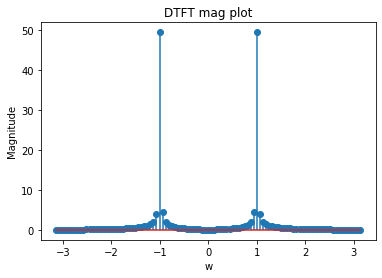

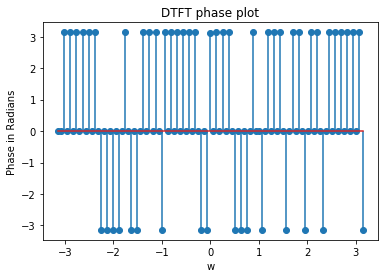

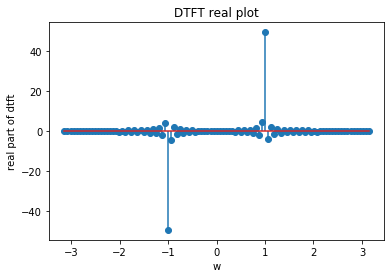

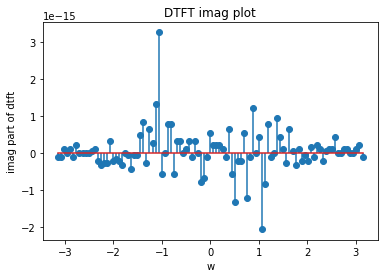

In [43]:
#question 4c

#importing modules
import numpy as np
from matplotlib import pyplot as plt

#DTFT with x[n] , n and w as parameters
def dtft(n , x , w):
    
    value = 0;
    
    for i in range(len(n)):
        value += x[i] * (np.exp(-1j * w * n[i])) #dtft expression
    
    #mag and phase for each w
    mag = np.sqrt((value.real ** 2) + (value.imag ** 2)) 
    phase = np.angle(value)
    
    return mag , phase , value

#a sin signal(imag and odd)
amp = 1
period = 2*np.pi
phase_diff = 0
    
#frequency
w_0 = (2 * np.pi)/period

#A*sin(ωn + ø(in rad))
x = [(amp * np.sin(w_0 * i + (phase_diff * np.pi/180)))*1j for i in range(-50 , 51)]
n = [i for i in range(-50 , 51)]

#partitioning frequencies from -pi to pi and creating a list
w_0_list = np.linspace(-np.pi , np.pi , 101)
w_0_list = w_0_list.tolist()

#empty lists for mag , phase , real and imag parts
mag = []
phase = []
dtft_real = []
dtft_imag = []

#running the dtft for all w
for w in w_0_list:
    m , p , v = dtft(n , x , w)
    mag.append(m)
    phase.append(p)
    dtft_real.append(v.real)
    dtft_imag.append(v.imag) 
        
#plots for mag and phase
plt.stem(w_0_list , mag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('DTFT mag plot')
plt.show()

plt.stem(w_0_list , phase , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Phase in Radians')
plt.title('DTFT phase plot')
plt.show()

#plots for real and imaginary parts
plt.stem(w_0_list , dtft_real , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('real part of dtft')
plt.title('DTFT real plot')
plt.show()

plt.stem(w_0_list , dtft_imag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('imag part of dtft')
plt.title('DTFT imag plot')
plt.show()

The real part of DTFT is odd and the imaginary part is extremely small but not precisely 0 as np.pi and np.e are not accurate

Enter the .wav file's name : armageddon.wav


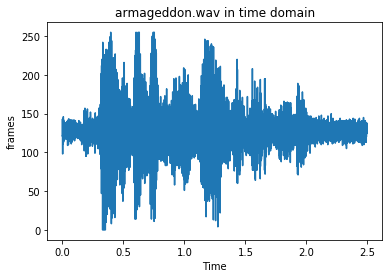

In [5]:
#question 5a

import numpy as np
import matplotlib.pyplot as plt
import wave

#asking for the file's name
file = input("Enter the .wav file's name : ")

#opening it
audio = wave.open(file , "r")

#getting frames and framerate
frames = list(audio.readframes(-1))
frame_rate = audio.getframerate()

#time = number of frames/framerate , number of samples = number of frames
time = np.linspace(0, len(frames)/frame_rate , num = len(frames)) 

#plotting it
plt.plot(time, frames)
plt.title(file + " in time domain")
plt.xlabel("Time")
plt.ylabel("frames")
plt.show()

Enter the .wav file's name : armageddon.wav


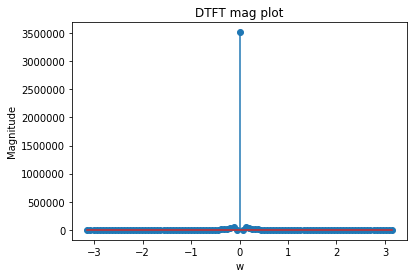

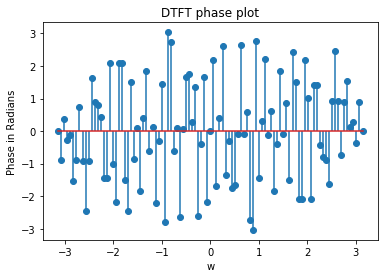

In [20]:
#question 5b

import numpy as np
import matplotlib.pyplot as plt
import wave

#DTFT with x[n] , n and w as parameters
def dtft(n , x , w):
    
    value = 0;
    
    for i in range(len(n)):
        value += x[i] * (np.exp(-1j * w * n[i])) #dtft expression
    
    #mag and phase for each w
    mag = np.sqrt((value.real ** 2) + (value.imag ** 2)) 
    phase = np.angle(value)
    
    return mag , phase

#asking for the file's name
file = input("Enter the .wav file's name : ")

#opening it
audio = wave.open(file , "r")

#getting frames and framerate
frames = np.array(np.array(list(audio.readframes(-1))))
n = np.arange(len(frames))

#partitioning frequencies from -pi to pi and creating a list
w_0_list = np.linspace(-np.pi , np.pi , 101)
w_0_list = w_0_list.tolist()

#empty lists for mag , phase , real and imag parts
mag = []
phase = []

#running the dtft for all w
for w in w_0_list:
    m , p = dtft(n , frames , w)
    mag.append(m)
    phase.append(p)
    
#creating stem plot for magnitude
plt.stem(w_0_list , mag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('DTFT mag plot')
plt.show()

#creating stem plot for magnitude
plt.stem(w_0_list , phase , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Phase in Radians')
plt.title('DTFT phase plot')
plt.show()

Enter the .wav file's name : armageddon.wav


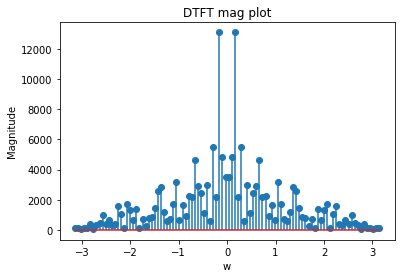

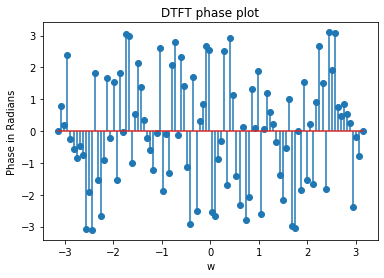

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import wave

def dtft(n , x , w):
    
    value = 0;
    
    for i in range(len(n)):
        value += x[i] * (np.exp(-1j * w * n[i])) #dtft expression
    
    #mag and phase for each w
    mag = np.sqrt((value.real ** 2) + (value.imag ** 2)) 
    phase = np.angle(value)
    
    return mag , phase

#asking for the file's name
file = input("Enter the .wav file's name : ")

#opening it
audio = wave.open(file , "r")

#getting frames and creating an array
frames = np.array(list(audio.readframes(-1))) 
x = np.array(frames)
n = np.arange(len(x)) 
w_0 = np.linspace(-np.pi, np.pi, 100)

#empty lists for mag and phase
mag = []
phase = []

#dtft for all w
for w in w_0:
    m,p = dtft(n , x , w)
    mag.append(m)
    phase.append(p)

#creating stem plot for magnitude
plt.stem(w_0 , mag , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Magnitude')
plt.title('DTFT mag plot')
plt.show()

#creating stem plot for magnitude
plt.stem(w_0, phase , use_line_collection=True)
plt.xlabel('w')
plt.ylabel('Phase in Radians')
plt.title('DTFT phase plot')
plt.show()

Observations

The wow.wav file which starts from a low pitch to a higher pitch has more spread frequencies when compared to other files which are mostly concentrated at 1 or 2 frequencies

Alarm , cry and armageddon are mostly concentrated at 1 frequency , but armageddon also has a magnitude for other frequencies instead of only spiking at a particular frequency due to the background noise